In [1]:
!pip install langchain pydantic langgraph langchain-core langchain-community langchain-groq arxiv wikipedia google-search-results PyMuPDF langchain-google-genai tiktoken

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.2/148.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [2]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv paper")
print(arxiv.name)


arxiv


In [4]:
arxiv.invoke('attention is all you need')

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [6]:
from google.colab import userdata
tavily_api_key=userdata.get('Tavily_api_key')
gemini_api_key=userdata.get("Gemini_api_key")
grok_api_key=userdata.get('Groq_api_key')
serp_api_key=userdata.get("Serp_api_key")

In [7]:
from langchain.tools import Tool
from serpapi import GoogleSearch

def semantic_scholar_search(query: str) -> str:
    """Searches Semantic Scholar for academic papers using SerpAPI."""
    params = {
        "q": f"{query} site:semanticscholar.org",
        "api_key": serp_api_key,
        "engine": "google",
        "num": 5
    }

    search = GoogleSearch(params)
    results = search.get_dict()

    output = ""
    for i, result in enumerate(results.get("organic_results", []), 1):
        title = result.get("title", "")
        link = result.get("link", "")
        snippet = result.get("snippet", "")
        output += f"{i}. {title}\n{snippet}\n{link}\n\n"

    return output or "No relevant Semantic Scholar results found."

semantic_scholar_tool = Tool(
    name="SemanticScholar",
    func=semantic_scholar_search,
    description="Searches Semantic Scholar for academic papers using SerpAPI."
)

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults(tavily_api_key=tavily_api_key)


In [9]:
tavily.invoke("update me with the latest ai developments")

[{'title': 'Latest AI Breakthroughs and News: March 2025 - Crescendo AI',
  'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
  'content': "Latest AI Breakthroughs and News: March 2025\n\nLatest AI Breakthroughs, News, and Updates\n\nWondering whatâ\x80\x99s happening in the AI world? Here is the list of the latest AI breakthroughs and news you must be aware of. The field of artificial intelligence continues to evolve at an unprecedented pace, with breakthroughs and advancements reshaping industries, governments, and daily life. Hereâ\x80\x99s a deeper look into some of the most impactful AI-related events. [...] Summary: Google announced significant AI advancements, including the release of Gemini 2.0, their most capable model to date, featuring agentic capabilities for developers, enterprises, and individuals. They also introduced new AI video and image generation models, Veo 2 and Imagen 3, achieving state-of-the-art results in head-to-head comparisons. These develo

In [10]:
tools=[arxiv,tavily,wiki,semantic_scholar_search]

In [11]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="qwen-qwq-32b",api_key=grok_api_key)

In [12]:
llm.invoke("what are transformers in ai")

AIMessage(content='\n<think>\nOkay, so I need to explain what transformers are in AI. Hmm, let me start by recalling what I know. Transformers are a type of neural network architecture, right? I remember they were introduced in a paper called "Attention Is All You Need" by Google. But wait, why are they important? Oh, right, because they revolutionized natural language processing and other sequence data tasks. \n\nFirst, I should define what a transformer is. They are models that use self-attention mechanisms, which allow them to weigh the importance of different parts of the input data. But how exactly does that work? I think self-attention lets the model focus on different words in a sentence when processing each word. That\'s different from previous models like RNNs or LSTMs, which process data sequentially and can have issues with long-range dependencies.\n\nLet me think about the components of a transformer. The paper mentions attention mechanisms, but there\'s more. The model is 

In [13]:
llm_with_tools=llm.bind_tools(tools=tools)


In [14]:
llm_with_tools.invoke("what is the latest ai development")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2cdv', 'function': {'arguments': '{"query": "latest AI developments"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 255, 'prompt_tokens': 418, 'total_tokens': 673, 'completion_time': 0.637306344, 'prompt_time': 0.03682684, 'queue_time': 0.030867368000000006, 'total_time': 0.674133184}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2d09765e-a249-4191-82b7-5e4d0ab9c0d9-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest AI developments'}, 'id': 'call_2cdv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 418, 'output_tokens': 255, 'total_tokens': 673})

In [15]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [16]:
class State(TypedDict):
  messages:Annotated[list[AnyMessage],add_messages]

In [17]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition


In [18]:
def tool_calling_llm(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

def research_agent(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

def answer_agent(state: State):
    return {"messages": [llm.invoke(state["messages"])]}



In [19]:
from langgraph.graph import END, START

# Add nodes
builder=StateGraph(State)
builder.add_node("research_agent", research_agent)
builder.add_node("tools", ToolNode(tools))
builder.add_node("answer_agent", answer_agent)

# Start edge
builder.add_edge(START,"research_agent")
# Conditional function
def research_condition(state: State):
    last_message= state["messages"][-1]
    if "tool_calls" in last_message.additional_kwargs:
        return "tools"
    else:
        return "answer_agent"

builder.add_conditional_edges("research_agent", research_condition, {"tools": "tools", "answer_agent": "answer_agent"})

# Tools back to research agent
builder.add_edge("tools", "research_agent")

# Answer agent to end
builder.add_edge("answer_agent", END)

# Compile
graph = builder.compile()

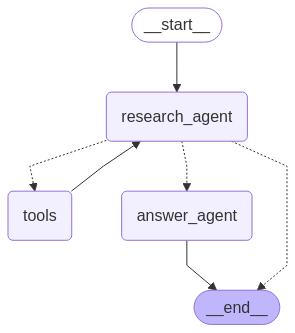

In [20]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
from langgraph.graph import END, START, StateGraph
def summarizer_agent(state: State):
    from langchain.prompts import PromptTemplate
    from langchain.chat_models import ChatOpenAI
    from langchain.chains import LLMChain

    # For  Extracting the latest assistant message (answer_agent's output)
    last_message = state["messages"][-1].content

    # Define summarization prompt
    summarization_prompt = PromptTemplate(
        input_variables=["text"],
        template="Summarize the following legal research result in a concise paragraph:\n\n{text}"
    )
    # Build the chain
    summarization_chain = LLMChain(llm=llm, prompt=summarization_prompt)

    #  summarization
    summary = summarization_chain.run(text=last_message)

    # Append summary message to state
    state["messages"].append(
        {"role": "assistant", "content": summary}
    )

    return state


builder = StateGraph(State)
builder.add_node("research_agent", research_agent)
builder.add_node("tools", ToolNode(tools))
builder.add_node("answer_agent", answer_agent)
builder.add_node("summarizer_agent", summarizer_agent)  # <- new summarizer node

builder.add_edge(START, "research_agent")

def research_condition(state: State):
    last_message = state["messages"][-1]
    if "tool_calls" in last_message.additional_kwargs:
        return "tools"
    else:
        return "answer_agent"

builder.add_conditional_edges(
    "research_agent",
    research_condition,
    {"tools": "tools", "answer_agent": "answer_agent"}
)

builder.add_edge("tools", "research_agent")

def summarizer_condition(state: State):
    if state.get("summarize"):
        return "summarizer_agent"
    else:
        return END

builder.add_conditional_edges(
    "answer_agent",
    summarizer_condition,
    {"summarizer_agent": "summarizer_agent", END: END}
)

# Summarizer agent to end
builder.add_edge("summarizer_agent", END)

graph = builder.compile()


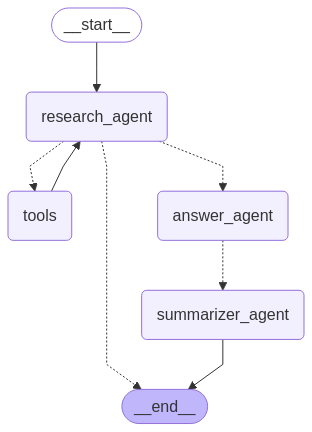

In [22]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
messages=graph.invoke({'messages':"what are the latest papers on llm based legal reasoning"})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

what are the latest papers on llm based legal reasoning
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_78qa)
 Call ID: call_78qa
  Args:
    query: LLM legal reasoning
================================= Tool Message =================================
Name: arxiv

Published: 2025-04-03
Title: LexPam: Legal Procedure Awareness-Guided Mathematical Reasoning
Authors: Kepu Zhang, Guofu Xie, Weijie Yu, Mingyue Xu, Xu Tang, Yaxin Li, Jun Xu
Summary: The legal mathematical reasoning ability of LLMs is crucial when applying
them to real-world scenarios, as it directly affects the credibility of the
LLM. While existing legal LLMs can perform general judicial question answering,
their legal mathematical reasoning capabilities have not been trained.
Open-domain reas
================================== Ai Message ==================================

Here's a summ

In [24]:
messages=graph.invoke({'messages':"what are the latest developments in quantum computing"})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

what are the latest developments in quantum computing
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_xey9)
 Call ID: call_xey9
  Args:
    query: latest developments in quantum computing 2023
  semantic_scholar_search (call_vkjy)
 Call ID: call_vkjy
  Args:
    query: recent advancements in quantum computing technologies
  tavily_search_results_json (call_z70b)
 Call ID: call_z70b
  Args:
    query: breakthroughs in quantum computing from the past 6 months
================================= Tool Message =================================
Name: arxiv

Published: 2023-01-27
Title: A Living Review of Quantum Computing for Plasma Physics
Authors: Óscar Amaro, Diogo Cruz
Summary: Quantum Computing promises accelerated simulation of certain classes of
problems, in particular in plasma physics. Given the nascent interest in
applying quantum computing tech